In [1]:
import pandas as pd
import numpy as np

## Aufgabe 1: Logistische Regression mit sklearn

#### a) Daten vorbereiten

Lesen Sie den Diabetes-Datensatz ein. Spalten Sie die Zielvariable (Outcome) ab und splitten Sie die Daten anschließend in Trainings- und Testdaten, sodass die Testdaten 30% der ursprünglichen Samples enthalen.

In [2]:
#TODO
from sklearn.model_selection import train_test_split

X = pd.read_csv('05_diabetes.csv')
print(X.head)
y = X.iloc[:,-1]
X = X.drop(X.columns[-1], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1)

<bound method NDFrame.head of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50 

#### b) Logistisches Regressionsmodell auf dem Datensatz trainieren

Trainieren Sie in Logistisches Regressionsmodell auf den Trainingsdaten.

In [3]:
#TODO
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)


C:\Users\Stefa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### c) Modellanwendung -und -bewertung

Wenden Sie das Modell auf den Trainingsdatensatz und auf den Testdatensatz an und berechnen Sie jeweils die Konfusionsmatrix, die Accuracy, die Precision und den Recall. 

In [4]:
#TODO
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


y_train_true = y_train
y_train_pred = clf.predict(X_train)

y_test_true = y_test
y_test_pred = clf.predict(X_test)

conf_train = confusion_matrix(y_train_true, y_train_pred)
conf_test = confusion_matrix(y_test_true, y_test_pred)

acc_train = accuracy_score(y_train_true, y_train_pred)
acc_test = accuracy_score(y_test_true, y_test_pred)

prec_train = precision_score(y_train_true, y_train_pred)
prec_test = precision_score(y_test_true, y_test_pred)

rec_train = recall_score(y_train_true, y_train_pred)
rec_test = recall_score(y_test_true, y_test_pred)

print("Konfusionsmatrix")
print(conf_train)
print(conf_test,"\n")

print("Accurancy")
print(acc_train)
print(acc_test,"\n")

print("Precision")
print(prec_train)
print(prec_test,"\n")

print("Recall")
print(rec_train)
print(rec_test,"\n")

Konfusionsmatrix
[[400  48]
 [104 139]]
[[45  7]
 [ 9 16]] 

Accurancy
0.7800289435600579
0.7922077922077922 

Precision
0.7433155080213903
0.6956521739130435 

Recall
0.5720164609053497
0.64 



#### d) ROC-Kurve zeichnen

Berechnen Sie die ROC-AUC-Scores für den Trainings- und den Testdatensatz und zeichen Sie die ROC-Kurven für den Trainings- und den Testdatensatz in ein gemeinsames Diagramm.

Train:  0.7324368018812463
Test:  0.7526923076923078


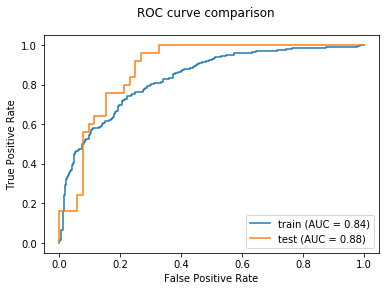

In [5]:
#TODO
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt

roc_train = roc_auc_score(y_train_true, y_train_pred)
roc_test = roc_auc_score(y_test_true, y_test_pred)

print("Train: ", roc_train)
print("Test: ", roc_test)

fig = plot_roc_curve(clf, X_train, y_train, name="train")
fig = plot_roc_curve(clf, X_test, y_test, ax=fig.ax_, name="test")
fig.figure_.suptitle("ROC curve comparison")
plt.show() 

#### e) Precision-Recall-Kurve zeichnen

Zeichen Sie die Precision-Recall-Kurve für den Trainings- und den Testdatensatz in ein gemeinsames Diagramm.

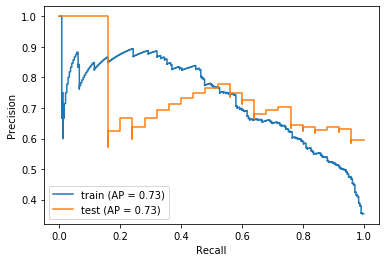

In [6]:
#TODO
from sklearn.metrics import plot_precision_recall_curve

fig = plot_precision_recall_curve(clf, X_train, y_train, name="train")
fig = plot_precision_recall_curve(clf, X_test, y_test, ax=fig.ax_, name="test")

plt.show()

#### f) Beurteilen Sie anhand der bisherigen Ergebnisse die Güte des Modells.

TODO

## Aufgabe 2: Implementierung eines Logistischen Regressionsmodells

In dieser Aufgabe soll ein Logistisches Regressionsmodell selbst implementiert werden und anhand des Iris-Datensatzes getestet werden.

#### Iris-Datensatz lesen

In [7]:
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)

In [8]:
X = X[0:100,0:2]
y = y[0:100].reshape(-1,1)

#### a) Logistische Funktion

Implementieren Sie die logistische Funktion $g(x)=\frac{1}{1+e^{-x}}$

In [186]:
import math
def g(x):
    g = (1)/(1+math.exp(-x))
    return g

#### b) Vektorisierte Modellfunktion

Implementieren Sie eine (vektorisierte) Funktion, die die Modellfunktion $f_{\vec{\theta}}(x)=g(\theta_0+\theta_1x_1+\ldots+\theta_px_p)=g(\vec{\theta}^T\vec{x})$ auf einem Datensatz bestehend aus $m$ Samples auswertet. Die Funktion soll den Vektor $\vec{\theta}=(\theta_0,\ldots,\theta_p)^T\in\mathbb{R}^{p+1}$ und die Daten-Matrix $M=\left(\begin{array}{ll}1&x^{(1)}_1&\ldots & x^{(1)}_p\\ 1 & x^{(2)}_1&\ldots & x^{(2)}_p\\ \vdots & \vdots &&\vdots \\ 1& x^{(m)}_1&\ldots & x^{(m)}_p\end{array}\right)$ als Argumente haben.

In [187]:
def f(M, theta, p = 0):        
        res = g(theta.T@M)
        return np.asarray(res)

#### c) Vektorisiertes Kostenfunktional

Implementieren Sie das Kostenfunktional $J(\vec{\theta})= -\frac{1}{m}\sum_{i=1}^m y^{(i)}\log\left(f_{\vec{\theta}}(\vec{x}^{(i)})\right)+(1-y^{(i)})\log\left(1-f_{\vec{\theta}}(\vec{x}^{(i)})\right)$

In [188]:
def J(M, y, theta):
    m = M.shape[0]
    j = -1/m*sum([y[i]*np.log(f(M[i, :]))+(1-y[i]*np.log(1-f(M[i,:]))) for i in range(m)])
    return j

#### d) Gradientenverfahren

Implementieren Sie das Gradientenverfahren für die Logistische Regression

In [189]:

def gradient_descent(M, y, theta, max_iter, tol):
    
    """
    Computes the weights of a logistic regression classifier using gradient descent
        
    Parameters:
        M (array of shape m x p+1): extended matrix of training examples (see above)
        y (array of shape m x 1): target values corresponding to X
        theta (array of shape p+1 x 1): initial values for the weights
        max_iter (int):  max number of iterations to be carried out
        tol: the iteration is stopped if norm(update)<tol
        
    Returns:
        theta (array of shape p+1 x 1): weights computed by gradient descent
    """

    a = 0.1
    m = M.shape[0]
    
    for x in range(max_iter):
        new_theta = theta -(a/m) * sum([np.subtract(f(M[i,:], theta), y[i])*M[i,:] for i in range(m)])

        new_theta = np.asarray([new_theta[0]]).T
        delta = np.sum(np.absolute(np.subtract(new_theta, theta)))
        theta = new_theta
        
        if delta < tol:
            return theta
        
    return theta
        

    #TODO

    

#### e) Implementierung des Klassifikators für Logistische Regression

Die folgende Klasse implementiert einen Klassifikator für Logistische Regression. Vervollständigen Sie die Methoden **predict_proba** und **predict**.

In [190]:
class MyLogisticRegressionClassifier:
    
    def __init__(self, max_iter=100):
        self.theta = None
        self.max_iter = max_iter
    
    def fit(self, X, y):
        """
        Fits a Logistic regression classifier by employing gradient descent. The the resulting weights 
        are stored in self.theta
        
        Parameters:
            X (array of shape m x p): matrix training examples
            y (array of shape m x 1): target values corresponding to X
        """

        m, p = X.shape
        M = np.ones((m,p+1))
        M[:,1:] = X

        theta = np.zeros((p+1,1))
        self.theta = gradient_descent(M, y, theta, self.max_iter, 1e-5)


    def predict_proba(self, X):
        """
        Predicts the class probabilities for the positive class for samples (rows) in X
        
        Parameters:
            X (array of shape m x p): matrix containing the samples
        
        Returns:
            y (array of shape m x 1): array containing the predicted class probabilities
        
        """
        m, p = X.shape
        M = np.ones((m,p+1))
        M[:,1:] = X
        
        proba = [float(f(M[i,:], self.theta)) for i in range(m)]
        
        return proba
    
    def predict(self, X):
        """
        Predicts the class lables for all samples (rows) in X
        
        Parameters:
            X (array of shape m x p): matrix containing the samples
        
        Returns:
            y (array of shape m x 1): array containing predicted class labels
        
        """
        proba = self.predict_proba(X)        
        pred = [round(p) for p in proba]
        return pred

#### f) Anwendung des Klassifikators

Wenden Sie den Klassifikator auf den Iris-Datensatz an. Berechnen Sie die erzielte Accuracy auf dem gesamten Datensatz.

In [191]:
#TODO
custom_clf = MyLogisticRegressionClassifier()
custom_clf.fit(X,y)
pred = custom_clf.predict(X)

acc = accuracy_score(y, pred)
print(acc)


0.99


#### g) Decision Boundary

Zeichnen Sie in das folgende Diagramm den decision boundary ein.

C:\Users\Stefa\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


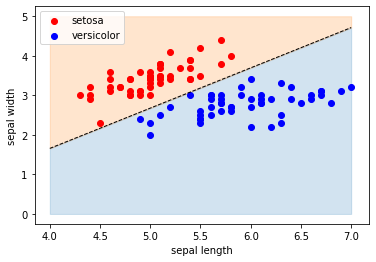

In [197]:
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X, y)

b = clf.intercept_[0]
w1, w2 = clf.coef_.T
c = -b/w2
m = -w1/w2
xmin, xmax = 4, 7
ymin, ymax = 0, 5
xd = np.array([xmin, xmax])
yd = m*xd + c
plt.plot(xd, yd, 'k', lw=1, ls='--')
plt.fill_between(xd, yd, ymin, color='tab:blue', alpha=0.2)
plt.fill_between(xd, yd, ymax, color='tab:orange', alpha=0.2)
setosa = plt.scatter(X[0:50,0], X[0:50,1], c='r')
versicolor = plt.scatter(X[50:100,0], X[50:100,1], c='b')

plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend((setosa, versicolor), ('setosa', 'versicolor'))